In [1]:
%tensorflow_version 2.x

In [2]:
!wget https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip

--2020-11-25 03:26:01--  https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip [following]
--2020-11-25 03:26:01--  https://www.dropbox.com/s/raw/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc15a91e98732d666927fd78081e.dl.dropboxusercontent.com/cd/0/inline/BD2zQgqxnSjTTagQljAAeUceNC52COri4bvFcu9myU-wa1rDHKsFiBkm6RPSuBzQ6CKM5VhCsp-6Tqc52ayAU4pAOEoM-taA2P7IV3GPhKGxng/file# [following]
--2020-11-25 03:26:02--  https://uc15a91e98732d666927fd78081e.dl.dropboxusercontent.com/cd/0/inline/BD2zQgqxnSjTTagQljAAeUceNC52COri4bvFcu9myU-wa

In [3]:
!unzip '/content/state-farm-distracted-driver-detection.zip'

Archive:  /content/state-farm-distracted-driver-detection.zip
  inflating: sample_submission.csv   
  inflating: driver_imgs_list.csv    
  inflating: imgs.zip                


In [4]:
!unzip '/content/imgs.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train/c7/img_56661.jpg  
  inflating: train/c7/img_56699.jpg  
  inflating: train/c7/img_56717.jpg  
  inflating: train/c7/img_56724.jpg  
  inflating: train/c7/img_56768.jpg  
  inflating: train/c7/img_56779.jpg  
  inflating: train/c7/img_56849.jpg  
  inflating: train/c7/img_56899.jpg  
  inflating: train/c7/img_56938.jpg  
  inflating: train/c7/img_5706.jpg   
  inflating: train/c7/img_57076.jpg  
  inflating: train/c7/img_57122.jpg  
  inflating: train/c7/img_57137.jpg  
  inflating: train/c7/img_5715.jpg   
  inflating: train/c7/img_57278.jpg  
  inflating: train/c7/img_57321.jpg  
  inflating: train/c7/img_57345.jpg  
  inflating: train/c7/img_57355.jpg  
  inflating: train/c7/img_5741.jpg   
  inflating: train/c7/img_57433.jpg  
  inflating: train/c7/img_5753.jpg   
  inflating: train/c7/img_57559.jpg  
  inflating: train/c7/img_57594.jpg  
  inflating: train/c7/img_5771.jpg   
  inflating: train/c7/img_57712.jpg  

In [6]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout

In [7]:
len(os.listdir('test'))

79726

In [8]:
print(len(os.listdir('/content/train/c0')))
print(len(os.listdir('/content/train/c1')))
print(len(os.listdir('/content/train/c2')))
print(len(os.listdir('/content/train/c3')))
print(len(os.listdir('/content/train/c4')))
print(len(os.listdir('/content/train/c5')))
print(len(os.listdir('/content/train/c6')))
print(len(os.listdir('/content/train/c7')))
print(len(os.listdir('/content/train/c8')))
print(len(os.listdir('/content/train/c9')))

2489
2267
2317
2346
2326
2312
2325
2002
1911
2129


No. of train images = 22,424
No. of test images = 79,726

In [9]:
model=Sequential()
model.add(Conv2D(32,(5,5),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation="relu"))

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,validation_split=0.20)

test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
#Test directory
%mkdir Test

In [16]:
#moving the test images to Test directory
!mv /content/test/  /content/Test

mv: cannot stat '/content/test/': No such file or directory


In [17]:
train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        subset='training'
        )

validation_generator = train_datagen.flow_from_directory(
        '/content/train',
         target_size=(64, 64),
         batch_size=32,
        class_mode='categorical',
         subset='validation'
        )


test_generator = test_datagen.flow_from_directory(
    '/content/Test',
        target_size=(64, 64),
        batch_size=2,
        shuffle=False,
        class_mode='categorical'
    
)

Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.
Found 79726 images belonging to 1 classes.


In [18]:
type(test_generator)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [19]:
STEPS_PER_EPOCH = train_generator.n//train_generator.batch_size
VALIDATION_STEPS=validation_generator.n//train_generator.batch_size

In [20]:
model.fit(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=VALIDATION_STEPS)

Epoch 1/10
560/560 [==============================] - 123s 219ms/step - loss: 2.1486 - accuracy: 0.2361 - val_loss: 2.0016 - val_accuracy: 0.4344
Epoch 2/10
560/560 [==============================] - 122s 217ms/step - loss: 1.9805 - accuracy: 0.3623 - val_loss: 1.8134 - val_accuracy: 0.2917
Epoch 3/10
560/560 [==============================] - 121s 216ms/step - loss: 1.9139 - accuracy: 0.3842 - val_loss: 2.7730 - val_accuracy: 0.2054
Epoch 4/10
560/560 [==============================] - 121s 215ms/step - loss: 2.0669 - accuracy: 0.2701 - val_loss: 2.0859 - val_accuracy: 0.2230
Epoch 5/10
560/560 [==============================] - 120s 215ms/step - loss: 2.2144 - accuracy: 0.1673 - val_loss: 2.0914 - val_accuracy: 0.2560
Epoch 6/10
560/560 [==============================] - 123s 219ms/step - loss: 2.0084 - accuracy: 0.2507 - val_loss: 1.7140 - val_accuracy: 0.4199
Epoch 7/10
560/560 [==============================] - 122s 217ms/step - loss: 1.9520 - accuracy: 0.3081 - val_loss: 1.8177 -

In [21]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation, BatchNormalization

In [22]:
mod = Sequential()
mod.add(Conv2D(32,kernel_size=(5,5),activation='relu',input_shape=(64,64,3)))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.3))
mod.add(Conv2D(64,kernel_size=(5,5),activation='relu',padding='same'))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.3))
mod.add(Conv2D(128,kernel_size=(5,5),activation='relu',padding='same'))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.5))
mod.add(Flatten())
mod.add(Dense(units = 512,activation='relu'))
mod.add(BatchNormalization())
mod.add(Dropout(0.5))
mod.add(Dense(units = 128,activation='relu'))
mod.add(Dropout(0.25))
mod.add(Dense(10,activation='softmax'))

In [23]:
mod.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
STEPS_PER_EPOCH = train_generator.n//train_generator.batch_size
VALIDATION_STEPS=validation_generator.n//train_generator.batch_size

In [25]:
model2=mod.fit(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=VALIDATION_STEPS)

Epoch 1/10
560/560 [==============================] - 125s 223ms/step - loss: 1.9827 - accuracy: 0.3323 - val_loss: 1.5706 - val_accuracy: 0.4643
Epoch 2/10
560/560 [==============================] - 122s 217ms/step - loss: 1.1453 - accuracy: 0.5917 - val_loss: 0.6713 - val_accuracy: 0.7761
Epoch 3/10
560/560 [==============================] - 120s 214ms/step - loss: 0.8116 - accuracy: 0.7174 - val_loss: 1.0538 - val_accuracy: 0.6502
Epoch 4/10
560/560 [==============================] - 120s 214ms/step - loss: 0.6579 - accuracy: 0.7740 - val_loss: 0.4186 - val_accuracy: 0.8627
Epoch 5/10
560/560 [==============================] - 119s 213ms/step - loss: 0.5386 - accuracy: 0.8202 - val_loss: 0.2274 - val_accuracy: 0.9324
Epoch 6/10
560/560 [==============================] - 119s 212ms/step - loss: 0.4764 - accuracy: 0.8415 - val_loss: 0.2370 - val_accuracy: 0.9230
Epoch 7/10
560/560 [==============================] - 118s 211ms/step - loss: 0.4212 - accuracy: 0.8606 - val_loss: 0.2123 -

In [26]:
%matplotlib inline  
import matplotlib.pyplot as plt

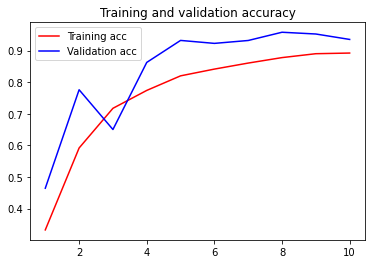

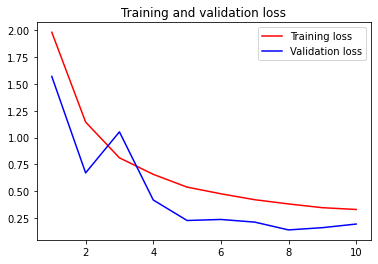

In [28]:
acc = model2.history['accuracy']
val_acc = model2.history['val_accuracy']
loss = model2.history['loss']
val_loss = model2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
#plotting train and validation losses
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [29]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=mod.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

Instructions for updating:
Please use Model.predict, which supports generators.
39863/39863 [==============================] - 409s 10ms/step


In [30]:
pred

array([[8.3461309e-05, 8.7959637e-07, 3.2940775e-08, ..., 1.1912917e-06,
        1.1058434e-05, 2.4595471e-05],
       [1.9483510e-07, 8.8504787e-10, 1.8657668e-07, ..., 7.1651775e-06,
        5.8241817e-06, 1.2204805e-08],
       [2.9406820e-03, 9.8914856e-01, 2.6386788e-05, ..., 1.6612777e-05,
        1.6337434e-03, 6.1292904e-03],
       ...,
       [7.8420405e-04, 1.5920901e-05, 2.1501050e-04, ..., 1.5814792e-03,
        4.2464770e-02, 1.8192433e-02],
       [1.5275199e-06, 2.8016552e-07, 5.2677058e-03, ..., 1.3898817e-07,
        3.1864498e-04, 1.6467859e-06],
       [1.1738480e-05, 4.9613923e-04, 1.1485229e-05, ..., 2.0342859e-06,
        2.7196521e-03, 1.1398651e-01]], dtype=float32)

In [31]:
len(pred)

79726

In [32]:
labels_test_predictions = pd.DataFrame(pred)
labels_test_predictions

,0,1,2,3,4,5,6,7,8,9
0,8.346131e-05,8.795964e-07,3.294078e-08,2.190961e-05,8.397010e-05,9.997723e-01,5.683061e-07,1.191292e-06,0.000011,2.459547e-05
1,1.948351e-07,8.850479e-10,1.865767e-07,7.910412e-05,2.050536e-05,9.998870e-01,6.467586e-09,7.165178e-06,0.000006,1.220481e-08
2,2.940682e-03,9.891486e-01,2.638679e-05,1.689888e-05,2.709512e-05,5.011486e-06,5.572557e-05,1.661278e-05,0.001634,6.129290e-03
3,1.684997e-03,6.127692e-03,1.363172e-03,4.871214e-06,7.362988e-03,6.233327e-05,8.209089e-01,8.008760e-05,0.155966,6.438609e-03
4,1.708231e-04,1.798697e-08,1.088230e-05,8.326644e-01,1.613592e-01,4.053869e-04,1.112031e-06,5.397636e-05,0.005333,1.045961e-06
...,...,...,...,...,...,...,...,...,...,...
79721,1.124769e-06,9.986253e-01,3.636959e-05,8.798512e-08,1.060753e-07,7.031343e-06,2.071502e-05,1.183253e-04,0.001096,9.489200e-05
79722,1.750493e-02,9.615529e-01,4.939144e-04,1.691335e-02,4.916558e-05,2.169687e-05,1.084453e-03,2.767891e-07,0.000894,1.485309e-03
79723,7.842041e-04,1.592090e-05,2.150105e-04,1.202044e-04,9.357476e-01,7.806854e-05,8.003567e-04,1.581479e-03,0.042465,1.819243e-02
79724,1.527520e-06,2.801655e-07,5.267706e-03,1.120596e-10,1.391919e-06,1.782656e-08,9.944087e-01,1.389882e-07,0.000319,1.646786e-06


In [33]:
labels_test_predictions.to_csv('Distracted_Driver_MultiAction_Classification.csv',index=False)

In [34]:
from google.colab import files
files.download("Distracted_Driver_MultiAction_Classification.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>